# Предобработка данных


In [ ]:
install.packages("lubridate")

In [ ]:
install.packages("vioplot")

In [ ]:
library(data.table)
install.packages("stringi")
library(tidyverse)
library(stringi)
require(dplyr)
library(lubridate)
library(vioplot)

In [ ]:
google_playstore<-read.csv("Google-Playstore.csv", header = TRUE,na.string=c(' '))
google_playstore<-na.omit(google_playstore)

In [ ]:
str(google_playstore)

'data.frame':	2290061 obs. of  24 variables:
 $ App.Name         : chr  "Gakondo" "Ampere Battery Info" "Vibook" "Smart City Trichy Public Service Vehicles 17UCS548" ...
 $ App.Id           : chr  "com.ishakwe.gakondo" "com.webserveis.batteryinfo" "com.doantiepvien.crm" "cst.stJoseph.ug17ucs548" ...
 $ Category         : chr  "Adventure" "Tools" "Productivity" "Communication" ...
 $ Rating           : num  0 4.4 0 5 0 0 4.5 2 0 4.7 ...
 $ Rating.Count     : int  0 64 0 5 0 0 12 39 0 820 ...
 $ Installs         : chr  "10+" "5,000+" "50+" "10+" ...
 $ Minimum.Installs : num  10 5000 50 10 100 50 1000 500 10 50000 ...
 $ Maximum.Installs : num  15 7662 58 19 478 ...
 $ Free             : chr  "True" "True" "True" "True" ...
 $ Price            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Currency         : chr  "USD" "USD" "USD" "USD" ...
 $ Size             : chr  "10M" "2.9M" "3.7M" "1.8M" ...
 $ Minimum.Android  : chr  "7.1 and up" "5.0 and up" "4.0.3 and up" "4.0.3 and up" ...
 $ Developer.Id  

Удалим "ненужные" столбцы, которые содержат либо дублирующую информацию (Installs), либо административные данные, не требующиеся для проверки наших гипотез (Developer Id).

In [ ]:
setDT(google_playstore)[,c("App.Id", "Installs", "Developer.Id", "Developer.Website", "Privacy.Policy", "Scraped.Time") := NULL] #удалим столбцы

In [ ]:
str(google_playstore) #проверОЧКА

Classes ‘data.table’ and 'data.frame':	2290061 obs. of  18 variables:
 $ App.Name        : chr  "Gakondo" "Ampere Battery Info" "Vibook" "Smart City Trichy Public Service Vehicles 17UCS548" ...
 $ Category        : chr  "Adventure" "Tools" "Productivity" "Communication" ...
 $ Rating          : num  0 4.4 0 5 0 0 4.5 2 0 4.7 ...
 $ Rating.Count    : int  0 64 0 5 0 0 12 39 0 820 ...
 $ Minimum.Installs: num  10 5000 50 10 100 50 1000 500 10 50000 ...
 $ Maximum.Installs: num  15 7662 58 19 478 ...
 $ Free            : chr  "True" "True" "True" "True" ...
 $ Price           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Currency        : chr  "USD" "USD" "USD" "USD" ...
 $ Size            : chr  "10M" "2.9M" "3.7M" "1.8M" ...
 $ Minimum.Android : chr  "7.1 and up" "5.0 and up" "4.0.3 and up" "4.0.3 and up" ...
 $ Developer.Email : chr  "jean21101999@gmail.com" "webserveis@gmail.com" "vnacrewit@gmail.com" "climatesmarttech2@gmail.com" ...
 $ Released        : chr  "Feb 26, 2020" "May 21, 2020" "Aug 9

In [ ]:
google_playstore$Size<-str_replace(google_playstore$Size, "M", "e+3")
google_playstore$Size<-str_replace(google_playstore$Size, "k", "")
google_playstore$Size<-str_replace(google_playstore$Size, "G", "e+6")
google_playstore$Size<-str_replace(google_playstore$Size, ",", "")
google_playstore$Size[google_playstore$Size == 'Varies with device'] <- NA
google_playstore<-na.omit(google_playstore)
google_playstore<-transform(google_playstore, Size= as.numeric(Size))

В минимальной версии андроида уберем примечание "and up"

In [ ]:
google_playstore$Minimum.Android<-str_remove(google_playstore$Minimum.Android, " and up")
google_playstore<-transform(google_playstore, Minimum.Android = as.numeric(Minimum.Android))
google_playstore<-na.omit(google_playstore)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


In [ ]:
google_playstore

App.Name,Category,Rating,Rating.Count,Minimum.Installs,Maximum.Installs,Free,Price,Currency,Size,Minimum.Android,Developer.Email,Released,Last.Updated,Content.Rating,Ad.Supported,In.App.Purchases,Editors.Choice
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Gakondo,Adventure,0.0,0,1e+01,15,True,0,USD,10000,7.1,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
Ampere Battery Info,Tools,4.4,64,5e+03,7662,True,0,USD,2900,5.0,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False
GROW.me,Tools,0.0,0,1e+02,478,True,0,USD,6200,4.1,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
IMOCCI,Social,0.0,0,5e+01,89,True,0,USD,46000,6.0,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False
unlimited 4G data prank free app,Libraries & Demo,4.5,12,1e+03,2567,True,0,USD,2500,4.1,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False
The Everyday Calendar,Lifestyle,2.0,39,5e+02,702,True,0,USD,16000,5.0,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,False,False,False
WhatsOpen,Communication,0.0,0,1e+01,18,True,0,USD,1300,4.4,yilver.mh1996@gmail.com,,"Dec 07, 2018",Teen,False,False,False
Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820,5e+04,62433,True,0,USD,3500,4.1,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False
Dodge The Cars!,Racing,4.9,55,1e+02,329,True,0,USD,51000,4.4,mithalaarush@gmail.com,"Jul 30, 2020","Jul 30, 2020",Everyone,False,False,False


In [ ]:
google_playstore$Released<-as.Date(google_playstore$Released,format="%b %d, %Y")
google_playstore$Last.Updated<-as.Date(google_playstore$Last.Updated,format="%b %d, %Y")
google_playstore$Editors.Choice<-as.logical(google_playstore$Editors.Choice)
google_playstore$Ad.Supported<-as.logical(google_playstore$Ad.Supported)
google_playstore$Ad.Free<-as.logical(google_playstore$Free)
google_playstore$In.App.Purchases<-as.logical(google_playstore$In.App.Purchases)

In [ ]:
str(google_playstore)

Classes ‘data.table’ and 'data.frame':	2014572 obs. of  19 variables:
 $ App.Name        : chr  "Gakondo" "Ampere Battery Info" "GROW.me" "IMOCCI" ...
 $ Category        : chr  "Adventure" "Tools" "Tools" "Social" ...
 $ Rating          : num  0 4.4 0 0 4.5 2 0 4.7 4.9 0 ...
 $ Rating.Count    : int  0 64 0 0 12 39 0 820 55 0 ...
 $ Minimum.Installs: num  10 5000 100 50 1000 500 10 50000 100 100 ...
 $ Maximum.Installs: num  15 7662 478 89 2567 ...
 $ Free            : chr  "True" "True" "True" "True" ...
 $ Price           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Currency        : chr  "USD" "USD" "USD" "USD" ...
 $ Size            : num  10000 2900 6200 46000 2500 16000 1300 3500 51000 2700 ...
 $ Minimum.Android : num  7.1 5 4.1 6 4.1 5 4.4 4.1 4.4 4 ...
 $ Developer.Email : chr  "jean21101999@gmail.com" "webserveis@gmail.com" "rmilekhorodyski@gmail.com" "info@imocci.com" ...
 $ Released        : Date, format: "2020-02-26" "2020-05-21" ...
 $ Last.Updated    : Date, format: "2020-02-26" "2

# Гипотеза 1: С каждым годом выпускается все больше приложений

С развитием технологий растёт необходимость в новых приложениях.
Каждый год выпускаются всё новые приложения, что заметно на данном графике. В конце графика наблюдается спад, так как dataset содержит данные не всего 2021 года, а только его части. (до июня 2021)


In [ ]:
google_playstore_year<-google_playstore
google_playstore_year$Released<-year(google_playstore_year$Released)
google_playstore_year


In [ ]:
google_playstore_year<-na.omit(google_playstore_year)
google_playstore_year<-google_playstore_year %>% count(Released)

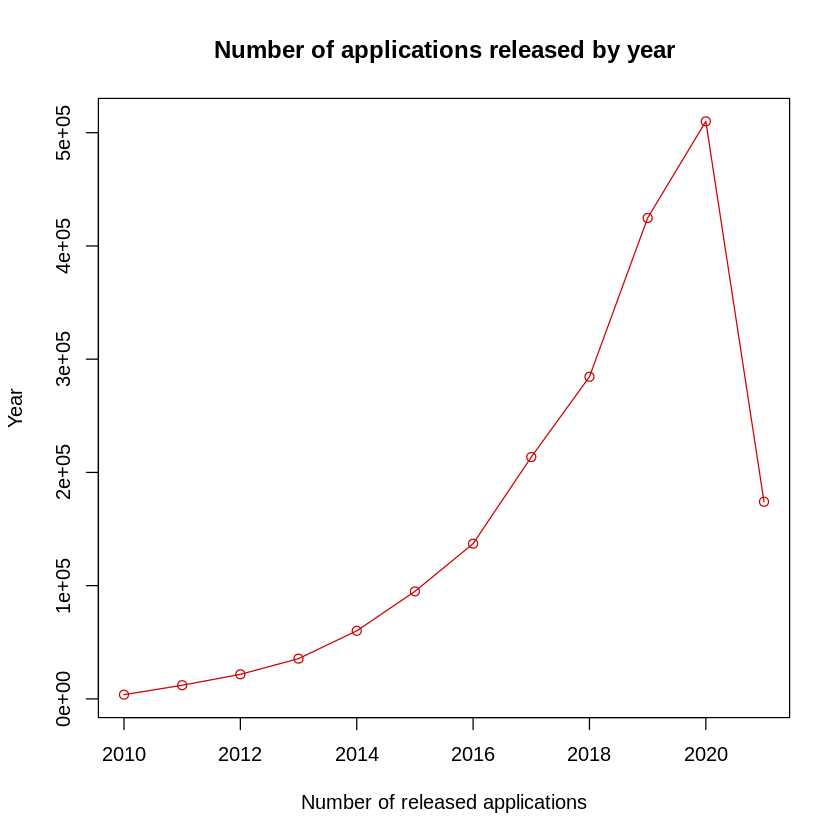

In [ ]:
plot(google_playstore_year$Released, google_playstore_year$n, xlab = "Number of released applications", ylab = "Year",
       main = "Number of applications released by year", type = "o",col='red3')

# Гипотеза 2:  Средний рейтинг приложений больше 4 
Большая часть приложений, к сожалению, не имеет оценок. Однако, большинство оставшихся приложений имеют достаточно высокий рейтинг, а именно выше 4, что наглядно видно на диаграмме.

In [ ]:
google_playstore_rating<-google_playstore
google_playstore_rating_not0<-google_playstore_rating[!(google_playstore_rating$Rating == 0),]

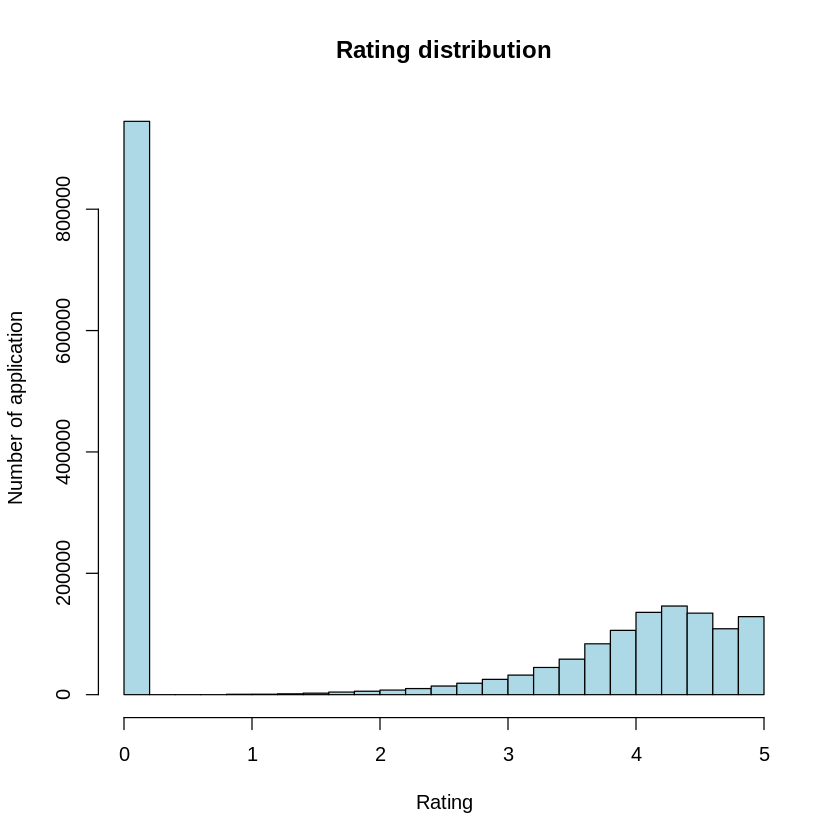

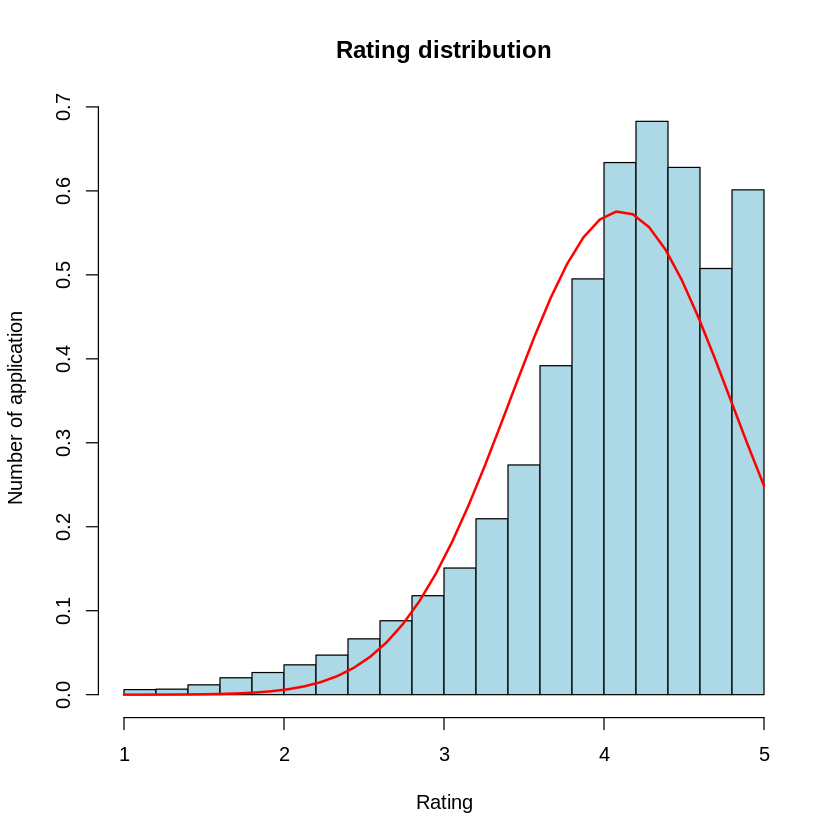

In [ ]:
hist(google_playstore_rating$Rating,col = "lightblue",xlab = "Rating",
      ylab = "Number of application",
      main = "Rating distribution")

hist(google_playstore_rating_not0$Rating, freq = FALSE, col = "lightblue",
      xlab = "Rating",
      ylab = "Number of application",
      main = "Rating distribution")
x <- seq(min(google_playstore_rating_not0$Rating), max(google_playstore_rating_not0$Rating), length = 40)
f <- dnorm(x, mean = mean(google_playstore_rating_not0$Rating), sd = sd(google_playstore_rating_not0$Rating))
lines(x, f, col = "red", lwd = 2)

# Гипотеза 3: Игры - самая распространенная категория в Play ['Strategy', 'Adventure', 'Word', 'Puzzle', 'Simulation', 'Role Playing', 'Action', 'Casual', 'Racing','Arcade', 'Card', 'Music', 'Trivia']

Игры пользуются спросом у любой возрастной категории, именно этим можно объяснить их высокую распрастраненность.

In [ ]:
google_playstore_games<-google_playstore

In [ ]:
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Adventure", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Libraries & Demo", "Books")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Racing", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Book & Reference", "Books")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Puzzle", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Arcade", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Educational", "Education")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Board", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Trivia", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Strategy", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Word", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Action", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Simulation", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Role Playing", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Card", "Games")
google_playstore_games$Category<-str_replace(google_playstore_games$Category, "Casual", "Games")

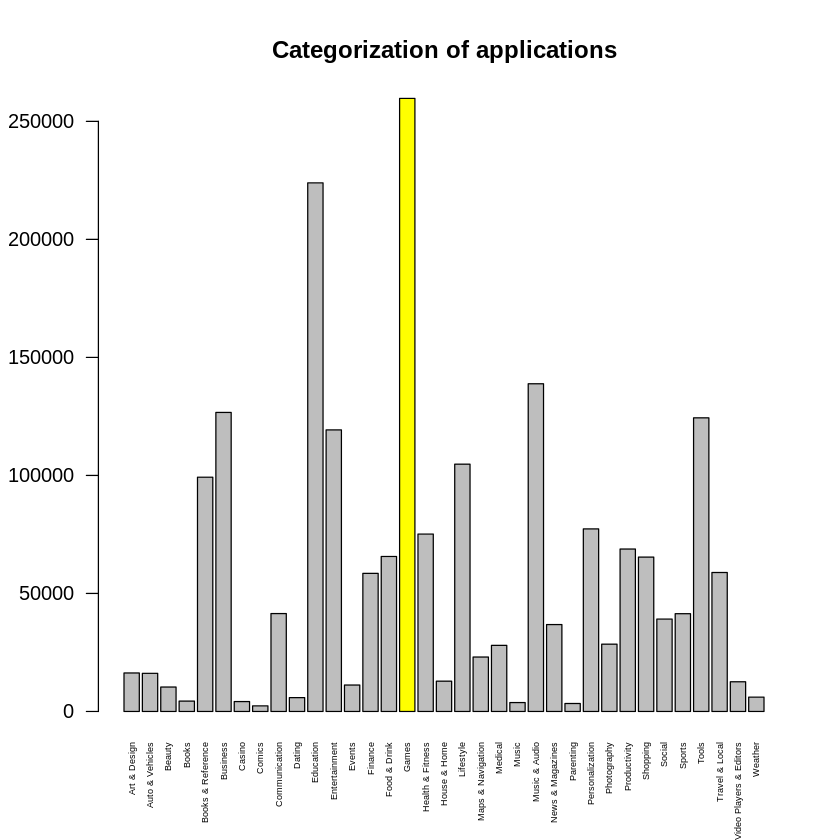

In [ ]:
google_playstore_categories<-google_playstore_games %>% count(Category)
colors = rep("gray", 50)
colors[google_playstore_categories$Category=='Games']='yellow'
barplot(google_playstore_categories$n, names.arg = google_playstore_categories$Category, horiz=FALSE,las=2 ,main = "Categorization of applications", col=colors,cex.names=0.45)

# Гипотеза 4: Бесплатные приложения чаще содержат рекламу

Бесплатные приложения тоже должны каким-либо способом приносить доход,наиболее известный способ заработка для таких приложений - реклама.
Как оказалось, бесплатные приложения действительно чаще содержат рекламу, разница более, чем 8 раз. Но почти половина бесплатных приложений рекламы всё-таки не имеет.



In [ ]:
google_playstore_paidcontent<-google_playstore

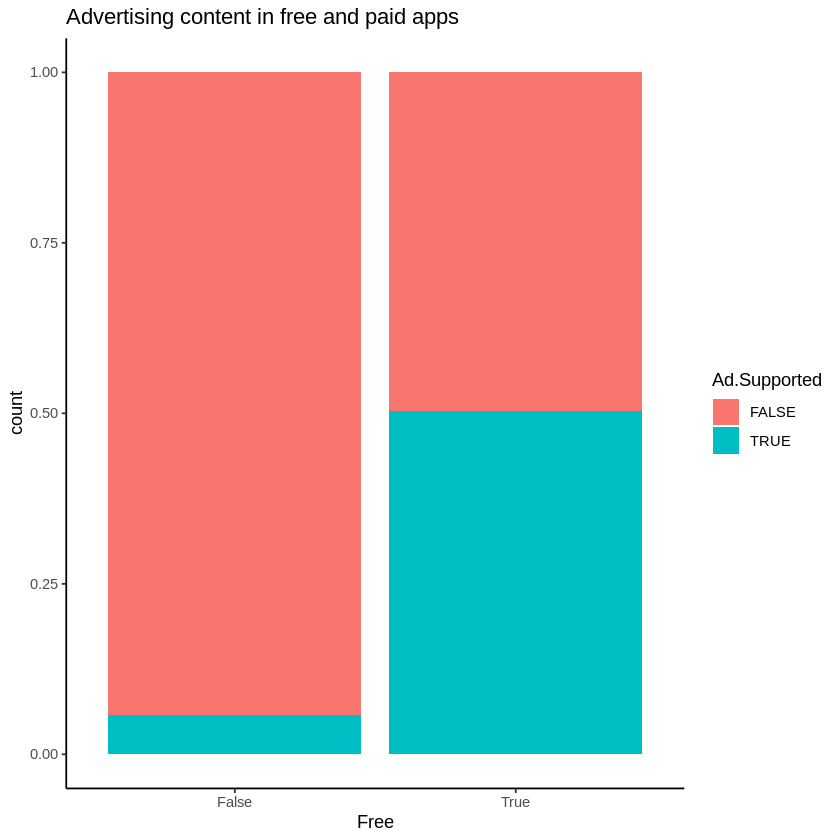

In [ ]:
ggplot(google_playstore_paidcontent, aes(x = Free, fill = Ad.Supported)) +
    geom_bar(position = "fill") +
    theme_classic()+
    labs(title = "Advertising content in free and paid apps")


# Гипотеза 5: Приложения без рекламы имеют более высокий рейтинг

Всплывающая реклама может серьезно мешать использованию приложения, что может повлечь за собой снижение рейтинга.

На диаграмме видно, что рейтинг приложений практически не зависит от наличия рекламы. Однако среднее значение у приложений без рекламы выше.

In [ ]:
google_playstore_ad<-google_playstore_rating_not0


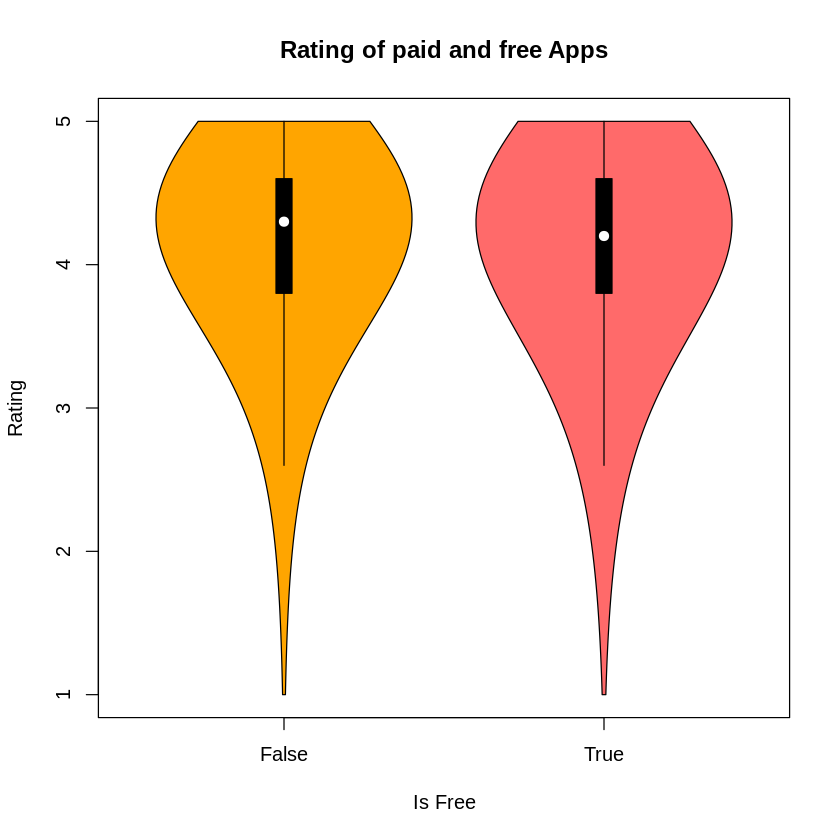

In [ ]:
vioplot(google_playstore_ad$Rating~google_playstore_ad$Free, col=c("orange","indianred1"),ylab="Rating",xlab="Is Free",main="Rating of paid and free Apps")

# Гипотеза 6: Наибольшее количество приложений в категории Games - это аркады

Аркада — жанр компьютерных игр, характеризующийся коротким по времени, но интенсивным игровым процессом. Мы предположили, что данные не требуемые больших усилий игры будут самыми популярными.

Как мы можем видеть на круговой диаграмме действительно Аркады оказались самыми опулярными играми (47946).

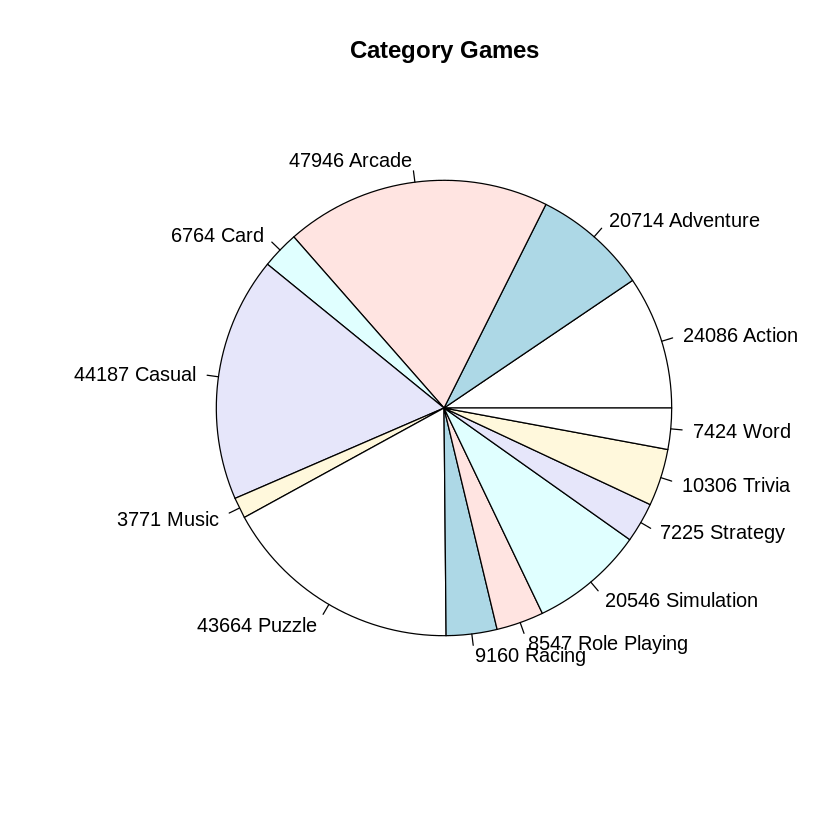

In [ ]:
google_playstore_game_2<-google_playstore
google_playstore_game_2<-google_playstore_game_2 %>% mutate (Is.Games=google_playstore$Category %in% c('Strategy', 'Adventure', 'Word', 'Puzzle', 'Simulation', 'Role Playing', 'Action', 'Casual', 'Racing','Arcade', 'Card', 'Music', 'Trivia'))

google_playstore_game_2<-google_playstore_game_2[google_playstore_game_2$Is.Games==TRUE,]
google_playstore_game_2<-google_playstore_game_2 %>% count(Category)

pie(google_playstore_game_2$n, labels = paste0(google_playstore_game_2$n,' ',google_playstore_game_2$Category),main="Category Games")

# Гипотеза 7: “Тяжелые” приложения (от 1 Gb) - это игры 

На данной многоуровневом кольцевом диаграмме видно, что больше половины тяжелые приложений это игры, и лишь не значительная часть - это Музыка и Образование. 

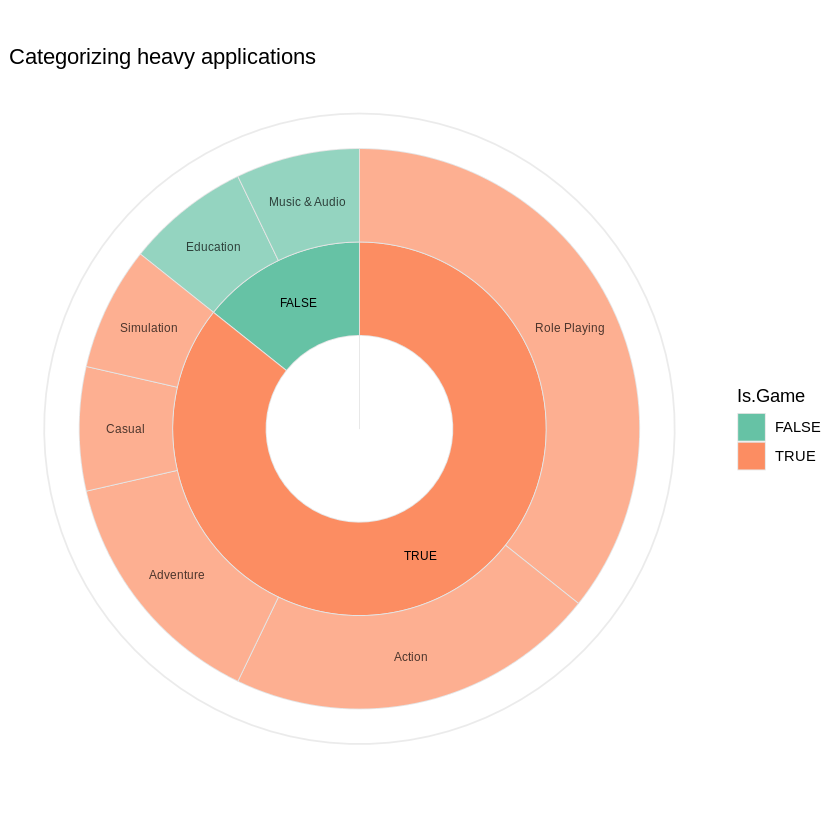

In [ ]:
google_playstore_large <- google_playstore[google_playstore$Size >= 1000000,]
 
google_playstore_large <- google_playstore_large %>% count(Category)
google_playstore_large <- google_playstore_large %>% mutate (Is.Games=google_playstore_large$Category %in% c('Strategy', 'Adventure', 'Word', 'Puzzle', 'Simulation', 'Role Playing', 'Action', 'Casual', 'Racing','Arcade', 'Card', 'Music', 'Trivia'))
 
google_playstore_large$Is.Games <- as.character(google_playstore_large$Is.Games)
 
colnames(google_playstore_large) <- c('type', 'value', 'name')
lvl0 <- tibble(name= '', value = 0, level = 0, fill = NA)
lvl1 <- google_playstore_large %>%
    group_by(name) %>%
    summarise(value = sum(value)) %>%
    ungroup() %>%
    mutate(level = 1) %>%
    mutate(fill = name)
lvl2 <- google_playstore_large %>%
    select(name = type, value, fill = name) %>%
    mutate(level = 2)
bind_rows(lvl0, lvl1, lvl2) %>%
    mutate(name = as.factor(name) %>% fct_reorder2(fill, value)) %>%
    arrange(fill, name) %>%
    mutate(level = as.factor(level)) %>%
    ggplot(aes(x = level, y = value, fill = fill, alpha = level)) +
        geom_col(width = 1, color = "gray90", size = 0.25, position = position_stack()) +
        geom_text(aes(label = name), size = 2.5, position = position_stack(vjust = 0.5)) +
        coord_polar(theta = "y") +
        scale_alpha_manual(values = c("0" = 0, "1" = 1, "2" = 0.7), guide = NULL) +
        scale_x_discrete(breaks = NULL) +
        scale_y_continuous(breaks = NULL) +
        scale_fill_brewer(palette = 'Set2', na.translate = F) +
        labs(x = NULL, y = NULL, fill = 'Is.Game') +
        ggtitle('Сategorizing heavy applications') +
        theme_minimal() 
 


# Гипотеза 8: Количество оценок зависит от количества скачиваний
Так как наш dataset имеет большое количество данных, большое количество выбросов неизбежно. Однако, несмотря на это, можно заметить некоторую связь между данными характеристиками.

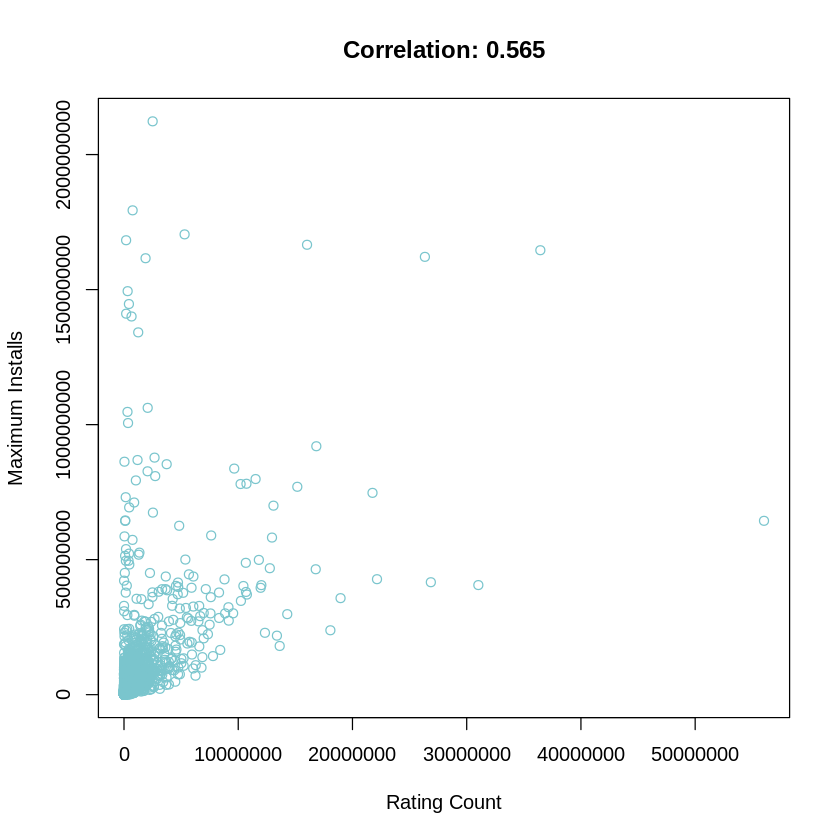

In [ ]:
titl = 'Correlation:'
corr = round(cor(google_playstore$Rating.Count, google_playstore$Maximum.Installs), 4)
plot(google_playstore$Rating.Count, google_playstore$Maximum.Installs, col='cadetblue3',xlab='Rating Count',ylab='Maximum Installs')
title(paste(titl, corr))
